<a href="https://colab.research.google.com/github/AnaYukimoto/Projetos-Python/blob/main/biometria_facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install Pillow numpy matplotlib mtcnn


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


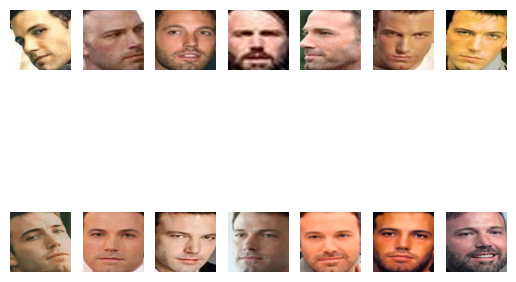

In [13]:
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from  mtcnn.mtcnn import MTCNN
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
# specify folder to plot
folder = '/content/drive/MyDrive/5-celebrity-faces-dataset/train/ben_afflek/'
i = 1
# enumerate files
for filename in listdir(folder):
	# path
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	# plot
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [16]:
pip install Pillow numpy matplotlib mtcnn

In [15]:
pip install tensorflow

In [17]:
from os import listdir
from os.path import isdir, join
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed, asarray

from mtcnn.mtcnn import MTCNN

# Extrair um único rosto de uma fotografia
def extract_face(filename, required_size=(160, 160)):
    try:
        # Carregar imagem do arquivo
        image = Image.open(filename)
        # Converter para RGB, se necessário
        image = image.convert('RGB')
        # Converter para array
        pixels = asarray(image)
        # Criar o detector, usando pesos padrão
        detector = MTCNN()
        # Detectar rostos na imagem
        results = detector.detect_faces(pixels)
        # Verificar se algum rosto foi detectado
        if len(results) == 0:
            raise ValueError("Nenhum rosto detectado")
        # Extrair a caixa delimitadora do primeiro rosto
        x1, y1, width, height = results[0]['box']
        # Correção de bugs
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # Extrair o rosto
        face = pixels[y1:y2, x1:x2]
        # Redimensionar pixels para o tamanho do modelo
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        return face_array
    except Exception as e:
        print(f"Erro ao processar {filename}: {e}")
        return None

# Carregar imagens e extrair rostos para todas as imagens em um diretório
def load_faces(directory):
    faces = list()
    # Enumerar arquivos
    for filename in listdir(directory):
        # Caminho
        path = join(directory, filename)
        # Obter rosto
        face = extract_face(path)
        if face is not None:  # Apenas adicione se o rosto foi extraído
            faces.append(face)
    return faces

# Carregar um conjunto de dados que contém um subdiretório para cada classe que, por sua vez, contém imagens
def load_dataset(directory):
    X, y = list(), list()
    # Enumerar pastas, uma por classe
    for subdir in listdir(directory):
        # Caminho
        path = join(directory, subdir)
        # Ignorar quaisquer arquivos que possam estar no diretório
        if not isdir(path):
            continue
        # Carregar todos os rostos no subdiretório
        faces = load_faces(path)
        # Criar rótulos
        labels = [subdir for _ in range(len(faces))]
        # Resumir progresso
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # Armazenar
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

# Carregar conjunto de dados de treinamento
trainX, trainy = load_dataset('/content/drive/MyDrive/5-celebrity-faces-dataset/train/')
print(trainX.shape, trainy.shape)

# Carregar conjunto de dados de teste
testX, testy = load_dataset('/content/drive/MyDrive/5-celebrity-faces-dataset/val/')
print(testX.shape, testy.shape)

# Salvar arrays em um único arquivo no formato compactado
savez_compressed('/content/drive/MyDrive/5-celebrity-faces-dataset/5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)


>loaded 21 examples for class: jerry_seinfeld
>loaded 14 examples for class: ben_afflek
>loaded 19 examples for class: madonna
>loaded 17 examples for class: elton_john
>loaded 22 examples for class: mindy_kaling
(93, 160, 160, 3) (93,)
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: mindy_kaling
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna
(25, 160, 160, 3) (25,)


In [3]:
pip install keras-facenet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.5 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=421b952610b1b44fdf6b34b5f908ff7ff51248f93f9a076565e876c0727039d6
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [11]:
# Importar as bibliotecas
from numpy import load, expand_dims, asarray, savez_compressed
from keras_facenet import FaceNet
from keras.models import load_model

# Função para obter a representação da face
def get_embedding(model, face_pixels):
    # Escalar valores dos pixels
    face_pixels = face_pixels.astype('float32')
    # Padronizar valores dos pixels através dos canais (global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std
    # Transformar a face em uma amostra
    samples = expand_dims(face_pixels, axis=0)
    # Fazer a previsão para obter a representação
    # Use embeddings method instead of predict
    yhat = model.embeddings(samples)
    return yhat[0]

# Carregar o conjunto de dados de faces
data = load('/content/drive/MyDrive/5-celebrity-faces-dataset/5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

# Carregar o modelo FaceNet
#model = load_model('facenet_keras.h5')
model = FaceNet()
print('Loaded Model')

# Converter cada face no conjunto de treinamento para uma representação
newTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

# Converter cada face no conjunto de teste para uma representação
newTestX = list()
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)

# Salvar arrays em um único arquivo em formato comprimido
savez_compressed('/content/drive/MyDrive/5-celebrity-faces-dataset/5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)
Loaded Model
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━

In [18]:
# develop a classifier for the 5 Celebrity Faces Dataset
from numpy import load
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
# load dataset
data = load('/content/drive/MyDrive/5-celebrity-faces-dataset/5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# predict
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=93, test=25
Accuracy: train=23.656, test=20.000


In [19]:
!pip install numpy scikit-learn matplotlib


Dataset: train=93, test=25
Predicted: mindy_kaling (17.744)
Expected: ben_afflek


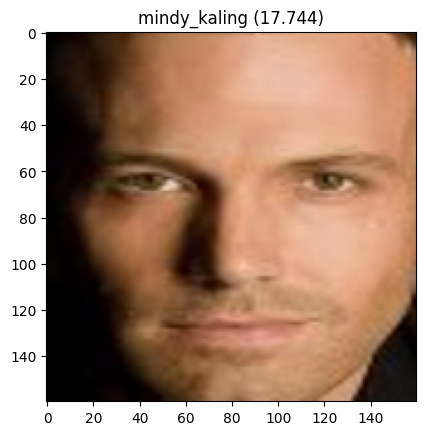

In [20]:
# develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
data = load('/content/drive/MyDrive/5-celebrity-faces-dataset/5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('/content/drive/MyDrive/5-celebrity-faces-dataset/5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'],data['arr_1'],data['arr_2'],data['arr_3']
# normalize input vectors
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()
